## Introduction


You will be using data from the [Progresa program](http://en.wikipedia.org/wiki/Oportunidades), a government social assistance program in Mexico. This program, as well as the details of its impact, are described in the paper "[School subsidies for the poor: evaluating the Mexican Progresa poverty program](http://www.sciencedirect.com/science/article/pii/S0304387803001858)", by Paul Shultz (available on Canvas). Please familiarize yourself with the PROGRESA program before beginning this problem set, so you have a rough sense of where the data come from and how they were generated. If you just proceed into the problem set without understanding Progresa or the data, it will be very difficult!

The goal of this problem set is to implement some of the basic econometric techniques that you are learning in class to measure the impact of Progresa on secondary school enrollment rates. The timeline of the program was:

 * Baseline survey conducted in 1997
 * Intervention begins in 1998, "Wave 1" of data collected in 1998
 * "Wave 2 of data" collected in 1999
 * Evaluation ends in 2000, at which point the control villages were treated. 
 
When you are ready, download the progresa_sample.csv data from Canvas. The data are actual data collected to evaluate the impact of the Progresa program.  In this file, each row corresponds to an observation taken for a given child for a given year. There are two years of data (1997 and 1998), and just under 40,000 children who are surveyed in each year. For each child-year observation, the following variables are collected:

| Variable name | Description|
|------|------|
|year	  |year in which data is collected
|sex	  |male = 1|
|indig	  |indigenous = 1|
|dist_sec |nearest distance to a secondary school|
|sc	      |enrolled in school in year of survey|
|grc      |grade enrolled|
|fam_n    |family size|
|min_dist |	min distance to an urban center|
|dist_cap |	min distance to the capital|
|poor     |	poor = 1|
|progresa |treatment =1|
|hohedu	  |years of schooling of head of household|
|hohwag	  |monthly wages of head of household|
|welfare_index|	welfare index used to classify poor|
|hohsex	|gender of head of household (male=1)|
|hohage	|age of head of household|
|age	|years old|
|folnum	|individual id|
|village|	village id|
|sc97	|schooling in 1997|

In [16]:
# importing modules
import pandas as pd
from pandas import DataFrame,Series
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
# importing the data
progresa_df = pd.read_csv("progresa_sample.csv")
progresa_df.head()

,year,sex,indig,dist_sec,sc,grc,fam_n,min_dist,dist_cap,poor,...,hohedu,hohwag,welfare_index,hohsex,hohage,age,village,folnum,grc97,sc97
0,97,0.0,0.0,4.473,1.0,7.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,13,163,1,7,1.0
1,98,0.0,0.0,4.473,1.0,8.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,14,163,1,7,1.0
2,97,1.0,0.0,4.473,1.0,6.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,12,163,2,6,1.0
3,98,1.0,0.0,4.473,1.0,7.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,13,163,2,6,1.0
4,97,0.0,0.0,4.473,1.0,2.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,8,163,3,2,1.0


---

## Part 1: Descriptive analysis

### 1.1	Summary Statistics

Present summary statistics (mean and standard deviation) for all of the demographic variables in the dataset (i.e., everything except year, folnum, village). Present these in a single table alphabetized by variable name. Do NOT simply expect the grader to scroll through your output!

In [18]:
# selecting required columns
summary_df = progresa_df.ix[:,progresa_df.columns-["year", "folnum", "village"]]

#selecting mean & std
summary_df = summary_df.describe()[1:3]

#transposing to avoid scrolling
summary_df.transpose()

/home/aamir/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  from ipykernel import kernelapp as app


,mean,std
age,11.366460,3.167744
dist_cap,147.674452,76.063134
dist_sec,2.418910,2.234109
fam_n,7.215715,2.352900
grc,3.963537,2.499063
grc97,3.705372,2.572387
hohage,44.436717,11.620372
hohedu,2.768104,2.656106
hohsex,0.925185,0.263095
hohwag,586.985312,788.133664


### 1.2 Differences at baseline?

Are the baseline (1997) demographic characteristics **for the poor**  different in treatment and control villages? Hint: Use a T-Test to determine whether there is a statistically significant difference in the average values of each of the variables in the dataset. Focus only on the data from 1997 for individuals who are poor (i.e., poor=='pobre').

Present your results in a single table with the following columns and 14 (or so) rows:

| Variable name | Average value (Treatment villages) | Average value (Control villages) | Difference (Treat - Control) | p-value |
|------|------|------|------|------|
|Male|?|?|?|?|


In [19]:
# Selecting base data i.e. 1997 data for poor
progresa_base_poor_df = progresa_df[(progresa_df["year"] == 97) & (progresa_df["poor"] == "pobre")]

#selecting the required columns
progresa_base_poor_df = progresa_base_poor_df.ix[:,progresa_base_poor_df.columns-["year", "folnum", "village"]]

#calculating the mean of the factors
progresa_base_poor_df.mean()

/home/aamir/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()


age               10.726541
dist_cap         151.950977
dist_sec           2.473930
fam_n              7.289393
grc                3.535968
grc97              3.535968
hohage            43.888471
hohedu             2.635368
hohsex             0.924004
hohwag           555.336325
indig              0.328360
min_dist         105.659262
sc                 0.819837
sc97               0.819837
sex                0.513875
welfare_index    657.006708
dtype: float64

In [20]:
#defining control and treatment groups
control_df = progresa_base_poor_df[progresa_base_poor_df["progresa"] == "0"]
treatment_df = progresa_base_poor_df[progresa_base_poor_df["progresa"] == "basal"]

#deleting columns for poor and progresa as they wont be required in the table of averages
del control_df["poor"]
del control_df["progresa"]
del treatment_df["poor"]
del treatment_df["progresa"]

In [21]:
treatment_df.columns

Index([u'age', u'dist_cap', u'dist_sec', u'fam_n', u'grc', u'grc97', u'hohage',
       u'hohedu', u'hohsex', u'hohwag', u'indig', u'min_dist', u'sc', u'sc97',
       u'sex', u'welfare_index'],
      dtype='object')

In [22]:
# creating the index and columns for the table of averages
index = ['age','dist_cap','dist_sec','fam_n','grc','grc97','hohage','hohedu','hohsex',
         'hohwag','indig','min_dist', 'sc','sc97','sex','welfare_index']
cols = ["Avg Values(Treatment Villages)","Avg Values(Control Villages)"]

In [23]:
#creating the dataframe for the table of averages
mean_table = pd.DataFrame(index = index, columns = cols)

In [24]:
#calculating the mean of each variable (15 variables chosen)
for i in range(16):
    mean_table["Avg Values(Treatment Villages)"][i] = treatment_df.mean()[i]
    mean_table["Avg Values(Control Villages)"][i] = control_df.mean()[i]

In [25]:
#inserting the differences for treatment and control
mean_table["Difference (Treat - Control)"] = mean_table["Avg Values(Treatment Villages)"] - mean_table["Avg Values(Control Villages)"]

In [26]:
mean_table

,Avg Values(Treatment Villages),Avg Values(Control Villages),Difference (Treat - Control)
age,10.717,10.742,-0.025032
dist_cap,150.829,153.77,-2.94066
dist_sec,2.45312,2.50766,-0.0545398
fam_n,7.28133,7.30247,-0.0211419
grc,3.5316,3.54305,-0.0114503
grc97,3.5316,3.54305,-0.0114503
hohage,43.6488,44.2769,-0.62809
hohedu,2.66314,2.59035,0.0727912
hohsex,0.924656,0.922947,0.00170878
hohwag,544.34,573.164,-28.824


In [27]:
#creating a column for p-value
mean_table["p-value"]=""
for i in index:
    #carrying out the ttest and then inserting the pvalues in the table of averages
    mean_table["p-value"][i] = scipy.stats.ttest_ind(control_df[i].dropna(),treatment_df[i].dropna())[1]

In [28]:
#displaying the table of averages
mean_table

,Avg Values(Treatment Villages),Avg Values(Control Villages),Difference (Treat - Control),p-value
age,10.717,10.742,-0.025032,0.478559
dist_cap,150.829,153.77,-2.94066,0.000841501
dist_sec,2.45312,2.50766,-0.0545398,0.0356984
fam_n,7.28133,7.30247,-0.0211419,0.427104
grc,3.5316,3.54305,-0.0114503,0.689015
grc97,3.5316,3.54305,-0.0114503,0.689015
hohage,43.6488,44.2769,-0.62809,1.79624e-06
hohedu,2.66314,2.59035,0.0727912,0.0110509
hohsex,0.924656,0.922947,0.00170878,0.571186
hohwag,544.34,573.164,-28.824,0.000325384


### 1.3 Interpretation

* A: Are there statistically significant differences between treatment and control villages as baseline? 
* B: Why does it matter if there are differences at baseline?
* C: What does this imply about how to measure the impact of the treatment?



* Part A --
Yes, there are statistically significant values between treatment and control villages as baseline. This is evident from the fact that there are certain p-values in the mean table which are below 0.05.

* Part B --
If there are statistically significant differences at the baseline, then it will imply that there is imbalance. The treatment and control group were not equal in all repsects and characteristics. It will imply that there exists a bias between the 2 groups and this will mean that differences in 2 groups post intervention cannot be fully attributed to the intervention. The differences can also arise because of statistically significant differences in characteristics that existed before the intervention.

* Part C --
This implies that the impact of the treatment should be measured in such a way that effect of the statistically significant characteristics should not be taken into account on the outcome change. The analysis should be adjusted appropriately to accomodate these baseline differences.

### 1.4 Graphical exploration, part 1

For each level of household head education, compute the average enrollment rate in 1997. Create a scatterplot that shows this relationship. What do you notice?

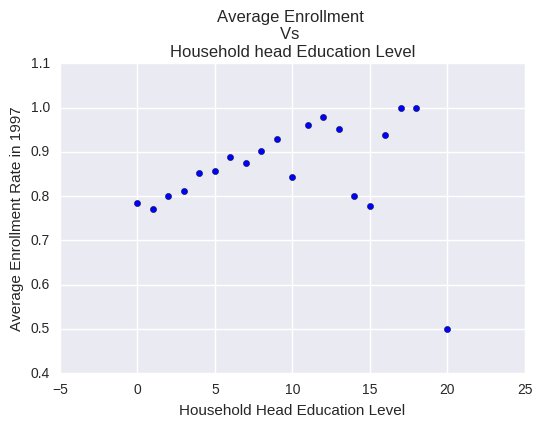

In [29]:
#grouping by househoild head education level and creating a mean
Education_Level_df = progresa_base_poor_df.groupby("hohedu", as_index=False).mean()

#plotting average enrollment for each household level
plt.scatter(Education_Level_df["hohedu"],Education_Level_df["sc97"])
plt.xlabel("Household Head Education Level")
plt.ylabel("Average Enrollment Rate in 1997")
plt.title("Average Enrollment \nVs \nHousehold head Education Level")
plt.show()

*Discuss your results here*

* We can see that the Average enrollment in schools starts at around 0.7 for the 0 level of household head education. 

* The enrollment gradually rises uptill the education level 12, except an ubrupt drop at level 10.

* After 12, the enrollment level shows a fluctuating behavior.

* At the education level 20, the mean enrollment is 0.5, which happens to be very low than the usual.

### 1.5 Graphical exploration, part 2

Create a histogram of village enrollment rates **among poor households in treated villages**, before and after treatment. Specifically, for each village, calculate the average rate of enrollment of poor households in treated villages in 1997, then compute the average rate of enrollment of poor households in treated villages in 1998. Create two separate histograms showing the distribution of these average enrollments rates, one histogram for 1997 and one histogram for 1998. On each histogram, draw a vertical line that intersects the x-axis at the average value (across all households). Does there appear to be a difference? Is this difference statistically significant?

In [30]:
#selecting poor households in treatment group
progresa_poor_treated_df = progresa_df[(progresa_df["poor"]=="pobre") & (progresa_df["progresa"]== "basal")]

#selecting pre data
before_treatment_df = progresa_poor_treated_df[progresa_poor_treated_df["year"] == 97]

#selecting post data
after_treatment_df = progresa_poor_treated_df[progresa_poor_treated_df["year"] == 98]

In [31]:
#grouping data by villages for pre and post
village_before_treatment_df=before_treatment_df.groupby("village", as_index=False).mean()
village_after_treatment_df=after_treatment_df.groupby("village",as_index=False).mean()

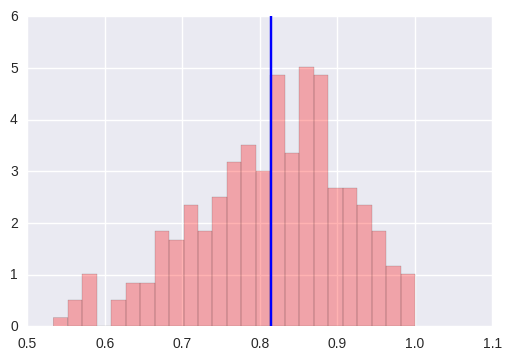

In [32]:
#plotting data for pre
plt.hist(village_before_treatment_df["sc"], normed = True, alpha = 0.3, bins = 25, color = "red")
plt.axvline(village_before_treatment_df["sc"].mean())

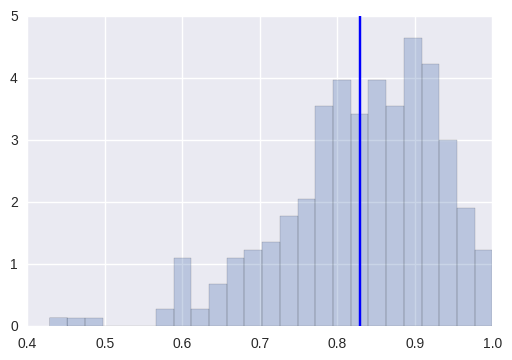

In [33]:
#plotting data for post
plt.hist(village_after_treatment_df["sc"], alpha = 0.3, normed = True, bins = 25)
plt.axvline(village_after_treatment_df["sc"].mean())

In [34]:
print ("The difference in enrollments for pre and post data : ")
village_after_treatment_df["sc"].mean() - village_before_treatment_df["sc"].mean()

The difference in enrollments for pre and post data : 


0.0156967932034231

In [35]:
scipy.stats.ttest_ind(village_after_treatment_df["sc"], village_before_treatment_df["sc"])

Ttest_indResult(statistic=2.0157134865156379, pvalue=0.04424870036572115)

* There is a very small positive effect in the average enrollment in schools before and after treatment. 
* The difference is statistically significant

## Part 2: Measuring Impact

Our goal is to estimate the causal impact of the PROGRESA program on the social and economic outcomes of individuals in Mexico. We will focus on the impact of the program on the poor (those with poor=='pobre'), since only the poor were eligible to receive the PROGRESA assistance.

### 2.1 Simple differences: T-test

Begin by estimating the impact of Progresa using "simple differences." Restricting yourself to data from 1998 (after treatment), calculate the average enrollment rate among **poor** households in the Treatment villages and the average enrollment rate among **poor** households in the control villages. Use a t-test to determine if this difference is statistically significant. What do you conclude?

In [36]:
# Your code here
progresa_98_df = progresa_df[progresa_df["year"] == 98]
progresa_98_control_df = progresa_98_df[progresa_98_df["progresa"] == "0"]
progresa_98_treatment_df = progresa_98_df[progresa_98_df["progresa"] == "basal"]
progresa_98_poor_control_df = progresa_98_control_df[progresa_98_control_df["poor"] == "pobre"]
progresa_98_poor_treatment_df = progresa_98_treatment_df[progresa_98_treatment_df["poor"] == "pobre"]

In [37]:
progresa_98_poor_df = progresa_98_df[progresa_98_df["poor"] == "pobre"]

In [38]:
progresa_98_poor_treatment_df["sc"].mean()-progresa_98_poor_control_df["sc"].mean()

0.0388421646651228

In [39]:
progresa_98_poor_control_df["sc"].dropna().shape

(10423,)

In [40]:
scipy.stats.ttest_ind(progresa_98_poor_treatment_df["sc"].dropna(), progresa_98_poor_control_df["sc"].dropna())

Ttest_indResult(statistic=8.3587205674183735, pvalue=6.636344447523235e-17)

* There is a 3.88% increase the average enrollment rate after the introduction of progresa.

* The p-value is much smaller than 0.05. This means that we fail to reject the null hypothesis that the average enrollment for the control and treatment group is identical.

### 2.2 Simple differences: Regression

Estimate the effects of Progresa on enrollment using a regression model, by regressing the 1998 enrollment rates **of the poor** on treatment assignment. Discuss the following:

* Based on this model, how much did Progresa increase the likelihood of a child enrolling?
* How does your regression estimate compare to your t-test estimate from part 2.1?
* Based on this regression model, can we reject the null hypothesis that the treatment effects are zero? 
* What is the counterfactual assumption underlying this regression?

In [41]:
progresa_98_poor_df.columns

Index([u'year', u'sex', u'indig', u'dist_sec', u'sc', u'grc', u'fam_n',
       u'min_dist', u'dist_cap', u'poor', u'progresa', u'hohedu', u'hohwag',
       u'welfare_index', u'hohsex', u'hohage', u'age', u'village', u'folnum',
       u'grc97', u'sc97'],
      dtype='object')

In [42]:
# Your code here
import statsmodels.formula.api as smf

In [43]:
model_1 = smf.ols(formula='sc ~ progresa', data = progresa_98_poor_df).fit()

In [44]:
model_1.params

Intercept            0.807637
progresa[T.basal]    0.038842
dtype: float64

In [45]:
model_1.conf_int()

,0,1
Intercept,0.800463,0.81481
progresa[T.basal],0.029734,0.04795


In [46]:
#model_1.summary()

In [47]:
model_1.pvalues

Intercept            0.000000e+00
progresa[T.basal]    6.636344e-17
dtype: float64

In [48]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     69.87
Date:                Wed, 25 Jan 2017   Prob (F-statistic):           6.64e-17
Time:                        02:48:47   Log-Likelihood:                -11926.
No. Observations:               27450   AIC:                         2.386e+04
Df Residuals:                   27448   BIC:                         2.387e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept             0.8076      0.004    220.676      0.000         0.800     0.815
progresa[T.basal]     0.0388      0.005      8.359      0.000         0.030     0.048
==============================================================================
Omnibus:                     7638.939   Durbin-Watson:                   1.734
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15767.534
Skew:                          -1.767   Prob(JB):                         0.00
Kurtosis:                       4.140   Cond. No.                         3.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Upon fitting the regression model, we can see that the coefficient for progresa is 0.0388, which implies that a unit increase in progresa will increase sc by 3.88%. 

* This value is same as that was obtained by calculating the difference between the average enrollment values. By looking at the p-values of value obtained by regression and by t-test, we can conclude that the values are statistically significant. Both these p-vaues have the same value.

* The p-value for the coefficient of progresa is much less than 5% implying that we fail to reject the null hypothesis that the treatment effects are zero.

* The counterfactual assumption in this case is that the enrollemnt for the poor in the year 1998 remains the same as the enrollemnt in 1997.

### 2.3 Multiple Regression

Re-run the above regression estimated but this time include a set of control variables. Include, for instance, age, distance to a secondary school, gender, education of household head, welfare index, indigenous, etc.

* How do the controls affect the point estimate of treatment effect?
* How do the controls affect the standard error on the treatment effect? 
* How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?

In [49]:
model_2 = smf.ols(
formula="sc ~ progresa + age + dist_sec + sex + hohedu + welfare_index + hohsex +indig + grc97 + fam_n + min_dist + dist_cap + hohwag + hohsex + hohage", 
data = progresa_98_poor_df).fit()

In [50]:
model_2.params

Intercept            1.565554
progresa[T.basal]    0.033558
age                 -0.083172
dist_sec            -0.008718
sex                  0.032484
hohedu               0.005861
welfare_index        0.000003
hohsex               0.007534
indig                0.024292
grc97                0.025498
fam_n                0.000740
min_dist             0.000393
dist_cap             0.000198
hohwag              -0.000001
hohage              -0.000152
dtype: float64

In [51]:
model_2.conf_int()

,0,1
Intercept,1.525688,1.605420
progresa[T.basal],0.025751,0.041366
age,-0.085572,-0.080772
dist_sec,-0.010457,-0.006980
sex,0.024937,0.040031
hohedu,0.004172,0.007550
welfare_index,-0.000032,0.000039
hohsex,-0.007565,0.022632
indig,0.015041,0.033544
grc97,0.022611,0.028384


In [52]:
model_2.pvalues

Intercept            0.000000e+00
progresa[T.basal]    3.791445e-17
age                  0.000000e+00
dist_sec             9.226850e-23
sex                  3.426701e-17
hohedu               1.048816e-11
welfare_index        8.571628e-01
hohsex               3.280736e-01
indig                2.672773e-07
grc97                8.632162e-67
fam_n                4.041443e-01
min_dist             5.006150e-10
dist_cap             7.962639e-08
hohwag               6.376904e-01
hohage               4.351597e-01
dtype: float64

In [53]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     757.4
Date:                Wed, 25 Jan 2017   Prob (F-statistic):               0.00
Time:                        02:48:48   Log-Likelihood:                -7390.0
No. Observations:               27260   AIC:                         1.481e+04
Df Residuals:                   27245   BIC:                         1.493e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept             1.5656      0.020     76.972      0.000         1.526     1.605
progresa[T.basal]     0.0336      0.004      8.425      0.000         0.026     0.041
age                  -0.0832      0.001    -67.928      0.000        -0.086    -0.081
dist_sec             -0.0087      0.001     -9.829      0.000        -0.010    -0.007
sex                   0.0325      0.004      8.437      0.000         0.025     0.040
hohedu                0.0059      0.001      6.803      0.000         0.004     0.008
welfare_index      3.269e-06   1.82e-05      0.180      0.857     -3.23e-05  3.89e-05
hohsex                0.0075      0.008      0.978      0.328        -0.008     0.023
indig                 0.0243      0.005      5.146      0.000         0.015     0.034
grc97                 0.0255      0.001     17.312      0.000         0.023     0.028
fam_n                 0.0007      0.001      0.834      0.404        -0.001     0.002
min_dist              0.0004   6.31e-05      6.221      0.000         0.000     0.001
dist_cap              0.0002   3.68e-05      5.369      0.000         0.000     0.000
hohwag            -1.325e-06   2.81e-06     -0.471      0.638     -6.84e-06  4.19e-06
hohage               -0.0002      0.000     -0.780      0.435        -0.001     0.000
==============================================================================
Omnibus:                     3066.652   Durbin-Watson:                   1.730
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4200.446
Skew:                          -0.943   Prob(JB):                         0.00
Kurtosis:                       3.371   Cond. No.                     1.10e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* After introduction of controls, we can see that the value of progresa decreases slightly from 3.8% to 3.3%. This change can be attributed to these controls. The significant controls in this case are - age, grc97, dist_sec, hohedu, indig, min_dist and dist_cap. Of these values, the age and grc97 affect the sc value a lot. For instance, a unit increase in age decreases the value of sc by 0.08 units keeping all other factors constant.

* The standard error in the measurement of the coefficient of the treatment effect is 0.5% in the 1st model and 0.4% in the 2nd model, therefore the controls measure the treatment effect with more accuracy.

* The coefficient value of the treatment decreases after the introduction of more controls. This is because the controls have some sort of effect on the treatment. More specifically, in the progresa scheme, houses with women as heads were given preference.


### 2.4 Difference-in-Difference, version 1 (tabular)

Thus far, we have computed the effects of Progresa by estimating the difference in 1998 enrollment rates across villages. An alternative approach would be to compute the treatment effect using a difference-in-differences framework.

Begin by estimating the average treatment effects of the program for poor households using data from 1997 and 1998. Specifically, calculate the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages; then compute the difference (between 1997 and 1998) in enrollment rates among poor households in control villages. The difference between these two differences is your estimate.

* What is your estimate of the impact, and how does it compare to your earlier (simple difference) results?
* What is the counterfactual assumption underlying this estimate? 


In [54]:
# Your code here
progresa_97_df = progresa_df[progresa_df["year"] == 97]
progresa_97_control_df = progresa_97_df[progresa_97_df["progresa"] == "0"]
progresa_97_treatment_df = progresa_97_df[progresa_97_df["progresa"] == "basal"]
progresa_97_poor_control_df = progresa_97_control_df[progresa_97_control_df["poor"] == "pobre"]
progresa_97_poor_treatment_df = progresa_97_treatment_df[progresa_97_treatment_df["poor"] == "pobre"]

In [55]:
diff_1 = progresa_98_poor_treatment_df["sc"].mean()-progresa_97_poor_treatment_df["sc"].mean()

In [56]:
diff_2 = (progresa_98_poor_control_df["sc"].mean()-progresa_97_poor_control_df["sc"].mean())

In [57]:
diff_1 - diff_2

0.031331280319323085

In [58]:
#counterfactual
progresa_98_poor_treatment_df["sc"].mean()-(diff_1-diff_2)

0.8151478410761077

In [59]:
progresa_97_poor_control_df["sc"].mean()

0.8151860030575845

* The estimate of impact calculated using the double difference comes out to be 0.0313. This is smaller than 0.0388, the value obtained using single difference method.It is calculated by calculating the difference between differences between treatmeant and control after and before the introduction of the intervention. A positive value of the double difference implies that progresa had 

* The underlying counterfactual assumption for this estimate is that in the absence of the intervention, the treatment and the control group show a similar trend or behavior.

### 2.5 Difference-in-Difference, version 1 (regression)

Now use a regression specification to estimate the average treatment effects of the program in a difference-in-differences framework. Include at least 5 control variables.

* What is your estimate of the impact of Progresa? Be very specific in interpreting your coefficients and standard errors, and make sure to specify exactly what units you are measuring and estimating.
* How do these estimates of the treatment effect compare to the estimates based on the simple difference?
* How do these estimates compare to the difference-in-difference estimates from 2.4 above? What accounts for these differences?
* What is the counterfactual assumption underlying this regression? 

In [60]:
progresa_poor_df=progresa_df[progresa_df["poor"]=="pobre"]

In [61]:
# Your code here
progresa_poor_df["Ti"]=""
progresa_poor_df["Posti"]=""

/home/aamir/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/aamir/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [62]:
progresa_poor_df.columns

Index([u'year', u'sex', u'indig', u'dist_sec', u'sc', u'grc', u'fam_n',
       u'min_dist', u'dist_cap', u'poor', u'progresa', u'hohedu', u'hohwag',
       u'welfare_index', u'hohsex', u'hohage', u'age', u'village', u'folnum',
       u'grc97', u'sc97', u'Ti', u'Posti'],
      dtype='object')

In [63]:
progresa_poor_df.loc[progresa_poor_df["progresa"]=="0","Ti"]=0
progresa_poor_df.loc[progresa_poor_df["progresa"]=="basal","Ti"]=1
progresa_poor_df.loc[progresa_poor_df["year"]==97,"Posti"]=0
progresa_poor_df.loc[progresa_poor_df["year"]==98,"Posti"]=1

/home/aamir/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [64]:
progresa_poor_df["TiXPosti"]=progresa_poor_df["Ti"]*progresa_poor_df["Posti"]

/home/aamir/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [65]:
#age,dist_sec,sex,hohedu,grc97,min_dist

In [66]:
model_3 = smf.ols(
formula="sc ~ Ti + Posti + TiXPosti + age + dist_sec + sex + hohedu + grc97 + min_dist", data = progresa_poor_df).fit()

In [67]:
model_3.params

Intercept        1.564682
Ti[T.1]          0.000909
Posti[T.1]       0.052104
TiXPosti[T.1]    0.031407
age             -0.089757
dist_sec        -0.007119
sex              0.036014
hohedu           0.004819
grc97            0.035582
min_dist         0.000694
dtype: float64

In [68]:
model_3.pvalues

Intercept         0.000000e+00
Ti[T.1]           8.076876e-01
Posti[T.1]        4.813541e-33
TiXPosti[T.1]     7.914134e-09
age               0.000000e+00
dist_sec          2.774288e-31
sex               2.693998e-42
hohedu            1.849707e-19
grc97            5.132244e-271
min_dist         1.172431e-106
dtype: float64

In [69]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     2726.
Date:                Wed, 25 Jan 2017   Prob (F-statistic):               0.00
Time:                        02:48:49   Log-Likelihood:                -16031.
No. Observations:               58352   AIC:                         3.208e+04
Df Residuals:                   58342   BIC:                         3.217e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         1.5647      0.008    197.393      0.000         1.549     1.580
Ti[T.1]           0.0009      0.004      0.243      0.808        -0.006     0.008
Posti[T.1]        0.0521      0.004     11.982      0.000         0.044     0.061
TiXPosti[T.1]     0.0314      0.005      5.771      0.000         0.021     0.042
age              -0.0898      0.001   -109.676      0.000        -0.091    -0.088
dist_sec         -0.0071      0.001    -11.641      0.000        -0.008    -0.006
sex               0.0360      0.003     13.640      0.000         0.031     0.041
hohedu            0.0048      0.001      9.025      0.000         0.004     0.006
grc97             0.0356      0.001     35.361      0.000         0.034     0.038
min_dist          0.0007   3.16e-05     21.982      0.000         0.001     0.001
==============================================================================
Omnibus:                     5922.931   Durbin-Watson:                   1.492
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7883.119
Skew:                          -0.884   Prob(JB):                         0.00
Kurtosis:                       3.340   Cond. No.                         731.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* By looking at the coefficient of the interaction term i.e. TiXPositi after fitting the regression model, we find the double difference to be equal to 0.0314. This implies that the impact of progresa over the time period has led to an increase of 3.14% in the average enrollment rate. The standard error in the measurement of the double difference is about 0.005 i.e. the actual impact of progresa on the average enrollment rate (sc) is 0.0314 +- 0.005 or in other words, in the range 3.09% to 3.19%. Over here, we have neglected the interaction term of the controls with the time and assumed that the control variables show similar trends. The rationale behind this is that variables like sex, distances, grade in the year 1997 will remain unchanged in time.

* These effects of treatment effect are lesser than the effect reflected by single difference method. The single difference method shows the impact of progresa as  a 3.8% increase in average enrollment rate.

* The double difference estimator in  2.4 is around 0.0313 which is very close to 0.0314 i.e. double difference obtained by fitting the regression model. The slight change is due to the fact that we have introduced 5 control variables in our regression model

* The underlying assumption for the counterfactual is that in the absence of intervention, the control & treatment show similar behavior across the time. The extra assumption, as pointed out in part 1, is that the control variables do not change across the time.

### 2.6 Difference-in-Difference, version 2

In the previous problem, you estimated a difference-in-differences model that compared changes in enrollment rates over time across treatment and control villages. An alternative approach would be to compare enrollment rates in 1998 between poor and non-poor across treatment and control villages. 

* How would we estimate this version of the treatment effects in a regression model? 
* What is the counterfactual assumption underlying this regression?
* How do these treatment effects compare to the estimates above?
* Discuss some possible explanations for differences or similarities 

In [70]:
# Your code here
progresa_98_df["Poori"]=""
progresa_98_df["Ti"]=""
progresa_98_df.loc[progresa_98_df["poor"]=="pobre","Poori"] = 1
progresa_98_df.loc[progresa_98_df["poor"]!="pobre","Poori"] = 0
progresa_98_df.loc[progresa_98_df["progresa"]=="basal","Ti"] = 1
progresa_98_df.loc[progresa_98_df["progresa"]=="0","Ti"] = 0

/home/aamir/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/aamir/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [71]:
progresa_98_df["TiXPoori"]=progresa_98_df["Ti"]*progresa_98_df["Poori"]

/home/aamir/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [72]:
progresa_98_df.columns

Index([u'year', u'sex', u'indig', u'dist_sec', u'sc', u'grc', u'fam_n',
       u'min_dist', u'dist_cap', u'poor', u'progresa', u'hohedu', u'hohwag',
       u'welfare_index', u'hohsex', u'hohage', u'age', u'village', u'folnum',
       u'grc97', u'sc97', u'Poori', u'Ti', u'TiXPoori'],
      dtype='object')

In [73]:
model_4 = smf.ols(
formula="sc ~ Ti + Poori + TiXPoori + age + dist_sec + sex + hohedu + grc97 + min_dist", data = progresa_98_df).fit()

In [74]:
model_4.params

Intercept        1.590025
Ti[T.1]          0.025927
Poori[T.1]      -0.005462
TiXPoori[T.1]    0.006138
age             -0.084186
dist_sec        -0.009094
sex              0.032699
hohedu           0.007289
grc97            0.025827
min_dist         0.000715
dtype: float64

* We can estimate this effect of progresa in a regression model by creating a dummy variable for treatment i.e. "DTi" & another dummy variable "DPoor" to account for poor and non poor.We can assign these dummy variables a value of 0 or 1. The DTi variable will control for the treatment and control groups. The DPoor variable will control for poor and non poor. After running the regression model, the coefficient of the interaction between the dummy terms will give us the treatment effect.

* The counterfactual assumption underlying this regression is that in the absence of the intervention, the average enrollment rate in the control and treatment villages would have followed the same trends.

* These estimates are low as compared to the other estimates.

* The reason for different estimate is that earlier we were just ooking for the impact on the poor and accomodated only poor people in the analysis. However, in thisregression model, we have accounted for non poor people as well. The estimates may be affected by this reason.

### 2.7 Spillover effects (extra credit)

Thus far, we have focused on the impact of PROGRESA on poor households. Repeat your analysis in 2.5, instead focusing on the impact of PROGRESA on non-poor households. 
* A: Describe one or two reasons why PROGRESA might have impacted non-poor households.
* B: Do you observe any impacts of PROGRESA on the non-poor?

In [75]:
# Your code here
progresa_nonpoor_df=progresa_df[progresa_df["poor"]!="pobre"]

In [76]:
progresa_nonpoor_df["Ti"]=""
progresa_nonpoor_df["Posti"]=""
progresa_nonpoor_df.loc[progresa_nonpoor_df["progresa"]=="basal", "Ti"]=1
progresa_nonpoor_df.loc[progresa_nonpoor_df["progresa"]=="0", "Ti"]=0
progresa_nonpoor_df.loc[progresa_nonpoor_df["year"]==98, "Posti"]=1
progresa_nonpoor_df.loc[progresa_nonpoor_df["year"]==97, "Posti"]=0

/home/aamir/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/aamir/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [77]:
progresa_nonpoor_df["TiXPosti"]=progresa_nonpoor_df["Ti"]*progresa_nonpoor_df["Posti"]

/home/aamir/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [78]:
model_5 = smf.ols(
formula="sc ~ Ti + Posti + TiXPosti + age + dist_sec + sex + hohedu + grc97 + min_dist", data = progresa_nonpoor_df).fit()

In [79]:
model_5.params

Intercept        1.702353
Ti[T.1]          0.025962
Posti[T.1]       0.073412
TiXPosti[T.1]   -0.001176
age             -0.107837
dist_sec        -0.011367
sex              0.034475
hohedu           0.006922
grc97            0.053606
min_dist         0.000535
dtype: float64

*Discuss your results here*

* Some households which were just crossing the threshold of the poverty line must have been non poor by definition. However, in reality, there condition will not have been the same as those non poor people, who are way above the poverty thershold. They would still need money in order fulfill their requirements. It might have been possible that such people would have entered the treatment group just for the extra money. Another possible spillover effect could have been that there was an interaction between children of poor and non poor families. The poor child may have told the non poor child about the benefits of progresa and this may have encouraged the non poor child to pose as a poor child.

* In the model that I have fitted with 6 control variables, I can see a negative spillover effect on the non poor group, whereby the average enrollment for non poor families decreases by a small amount.

### 2.8 Summary

Based on all the analysis you have undertaken to date, do you believe that Progresa had a causal impact on the enrollment rates of poor households in Mexico?



* Progresa does have a causal impact on the average enrollment of the poor.
